#Introduction




##Aim for Our Project
Our project aims to develop a robust predictive model for diabetes analysis such as diabetes prediction, blood glucose control, patient outcome, etc. Given the significant impact diabetes has in today's society and the increasing availability of **healthcare data**, effective analytical models are cruical for early detection, personalized treatment and improved patient outcomes.

Our team will explore a dataset related to different variables surrounding diabetes to identify key features and relationships that contribute to the outcome. We will leverage various machine learning techniques, including logistic regression, a Support Vector Machines (SVM), K-Nearest Neighbors (KNN) and different tree models to build predictive models.

Our approach will consist of the following developmental stages of our analysis:


*   **Comprehensive EDA :** We will begin by thoroughly examining the dataset, creating a comprehensive data summary and performing an EDA to uncover patterns, outliers and potential issues. This will involve utilizing frameworks such as the "7 stories one tells with data" to gain deeper insights.

*   **Data Processing and Feature Engineering :** To prepare the data for modeling, we will address missing values through various imputation techniques and engineer new features that may enhance model performance. We will carefully test out feature engineering and imputation strategies using statistical methods like chi-square and it's p-values.
*   **Model Development and Evaluation :** We will develop a range of predictive models, evaluating their performance using a suite of metrics including Precision, Accuracy, Recall, Specificity and F1-Score.


*   **Hyperparameter Tuning and Ensemble Modeling :** To optimize our models, we will systematically tune hyperparameters and explore the benefits of combining multiple models throguh ensemble methods.


*   **Comprehensive Analysis and Reporting :** Finally, we will summarize our end-to-end data science approach, discuss the iterative process of model refinement, and present the characteristics and performance of our final chosen model.

Through this **structured approach**, our goal is to deliver an insightful analysis and reliable predictive model that can contribute to better understanding and management of predicting trends in those with diabetes.



##What is diabetes?
Diabetes is a condition were your blood sugar is high and your pancreas doesn’t make enough insulin or isn’t responding to the effects of insulin properly (Cleveland Clinic). Glucose or sugar comes from the foods and drinks we consume. Foods like rice, potatoe, fruits are high in carbohydrates. These carbohydrates are broken down into glucose during digestion. When glucose or simple sugar enter our blood streams, it will trigger the pancreas to release insulin. Insulin is what opens up the cells for the cells to receive glucose. Without insulin, the cell will not open and the glucose will stay in the blood stream. This causes high glucose levels in the body, which will lead to other health issues.

*Diabetes*, from Cleveland Clinic. https://my.clevelandclinic.org/health/diseases/7104-diabetes

##Questions To Ask Before Analyzing Our Data Set

Prior to fully breaking down our dataset into a more concise and cleaned set of data, we can prepare questions to solve based on the features presented such as :


*   What might indicate that someone *has* diabetes?

*   As you age, does your risk of diabetes *increase*?

*   How does insulin levels *indicate* diabetes?

*   Does pregnancy play a *key role* in hereditary diabetes?

*   Do any physical traits in a carrier *indicate* that they have diabetes?

Something to keep in mind as well :

*  Hormonal imbalances: During pregnancy, the placenta releases hormones that cause insulin resistance. You may develop gestational diabetes if your pancreas can’t produce enough insulin to overcome the insulin resistance. Other hormone-related conditions like acromegaly and Cushing syndrome can also cause Type 2 diabetes (Cleveland Clinic).


### Data Descriptions

Below is a detailed explanation of each feature in the diabetes dataset. These variables come from medical measurements of Pima Indian women, used to predict whether they have diabetes (`Outcome = 1`) or not (`Outcome = 0`).

| Variable | Meaning |
|----------|---------|
| **Pregnancies** | Number of times the patient has been pregnant. |
| **Glucose** | Plasma glucose concentration (mg/dL). Higher values indicate higher blood sugar levels. 0 values are invalid and should be treated as missing. |
| **BloodPressure** | Diastolic blood pressure (mm Hg). Normal range is 60–90 mmHg. 0 values are not valid. |
| **SkinThickness** | Triceps skinfold thickness (mm), used to estimate body fat. 0 values are missing. |
| **Insulin** | 2-Hour serum insulin (mu U/ml) after glucose intake. 0 means missing, not truly zero insulin. |
| **BMI** | Body Mass Index = weight (kg) / height (m)^2. A value of 0 is invalid and should be handled. |
| **DiabetesPedigreeFunction** | A function that scores diabetes likelihood based on family history. Higher = more genetic risk. |
| **Age** | Patient’s age in years (21 and above). |
| **Outcome** | **Target variable** — 1 = patient has diabetes, 0 = patient does not. |


# Conducting Our EDA :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset from github repository
url = "https://github.com/falsefoobar/CS381/blob/main/diabetes.csv?raw=True"
df = pd.read_csv(url)


display(df.head())
display(df.info())
display(df.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

(768, 9)

##Dataset Pre-Processing
After extracting our data we can see the dataset's structure, content and characteristics before we conduct a more in-depth analysis.


*   `df.head()` lists some of the prominent column names such as `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age` and `Outcome`
  * We can see that the data types all appear to be numerical, meaning we do not need to order the values into a categorical format.  
* `df.info()` displays the column by index and confirms the data types of the values per row. We also confirm that there are only `non-null` entries.
*`df.shape()` returns a tuple representing the dimensions of the dataframe which means we have 9 confirmed features and 768 patient records to work with.

After extracting the features from this dataset, we can look into the deeper meaning behind the variables :

* `Pregnancies`: The number of times the patient has been pregnant.

* `Glucose`: the concentration of glucose in the blood

* `BloodPressure`: thepatient's blood pressure  

* `SkinThickness`:  The thickness of the skin

* `Insulin`: The level of insulin in the blood

* `BMI`: The body mass index

* `DiabetesPedigreeFunction`: a measure of diabetes family history

* `Age`: age of the patient

* `Outcome`: 0 for negative, 1 for positive for diabetes

## Statistical Data for Numerical Features
A statistical summary give sus precise numbers to describe our data. We're able to:

*   **Quantify our Data :** We have exact figures to the skew of our histograms.
*   **Identifying Central Tendencies :** We can assess the median, mean and standard deviation of our features.
* **Pinpointing Issues and Inform PreProcessing :** We can explicitly check our values and begin to generate suspicions about possibilites of missing data. We can also highlight extreme maximum values as outliers. We can begin to prep the columns that are identified to need imputation, transformation or outlier handling.

We generate our statistics by using `df.describe()` method.




In [ ]:
# Outputting descriptive statistics for all numerical columns into a Data Frame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing Data (0) and duplicates Check

In [8]:
# Count invalid values (0) in key features
columns_with_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[columns_with_invalid] == 0).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [7]:
# Check for duplicate rows excluding the 'Unnamed: 0' column
df.duplicated().sum()

np.int64(0)

###Points Of Interest

There are some quick observations we can see from our statistical table such as:

- **Missing Data Values** :  
  It seems that the minimum for `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` is **0**, which is **impossible** for these features. These values likely represent **missing data**. Below is the count of zero values:

  - `Glucose`: 5  
  - `BloodPressure`: 35  
  - `SkinThickness`: 227  
  - `Insulin`: 374  
  - `BMI`: 11

  We can properly look into them through our generated histograms, but we need to be cautious about these missing values as they can impact model accuracy if not handled.

- **Heavy Outliers** :  
  We can see that for `Pregnancies`, we have a high maximum value of **17**, which, while not *impossible*, is very unlikely and may be an outlier.  
  We can also see `Insulin`'s maximum value is **846**, which is medically unreasonable. Feature Engineering can help tackle any potential outliers we have in our data.

- **No Strong Redundancy or Repetition**:  
  From initial inspection, we see **no repeated constant values** or duplicated features that could introduce **bias** or make the model overly dependent on any one feature. This is good for preserving generalization ability and reducing overfitting risk.

After generating a statistical summary of our numerical features, we can move on towards visualizing our data.



## Visualizations of Data
We can properly represent the data visually and understand the distributions more comprehensively.

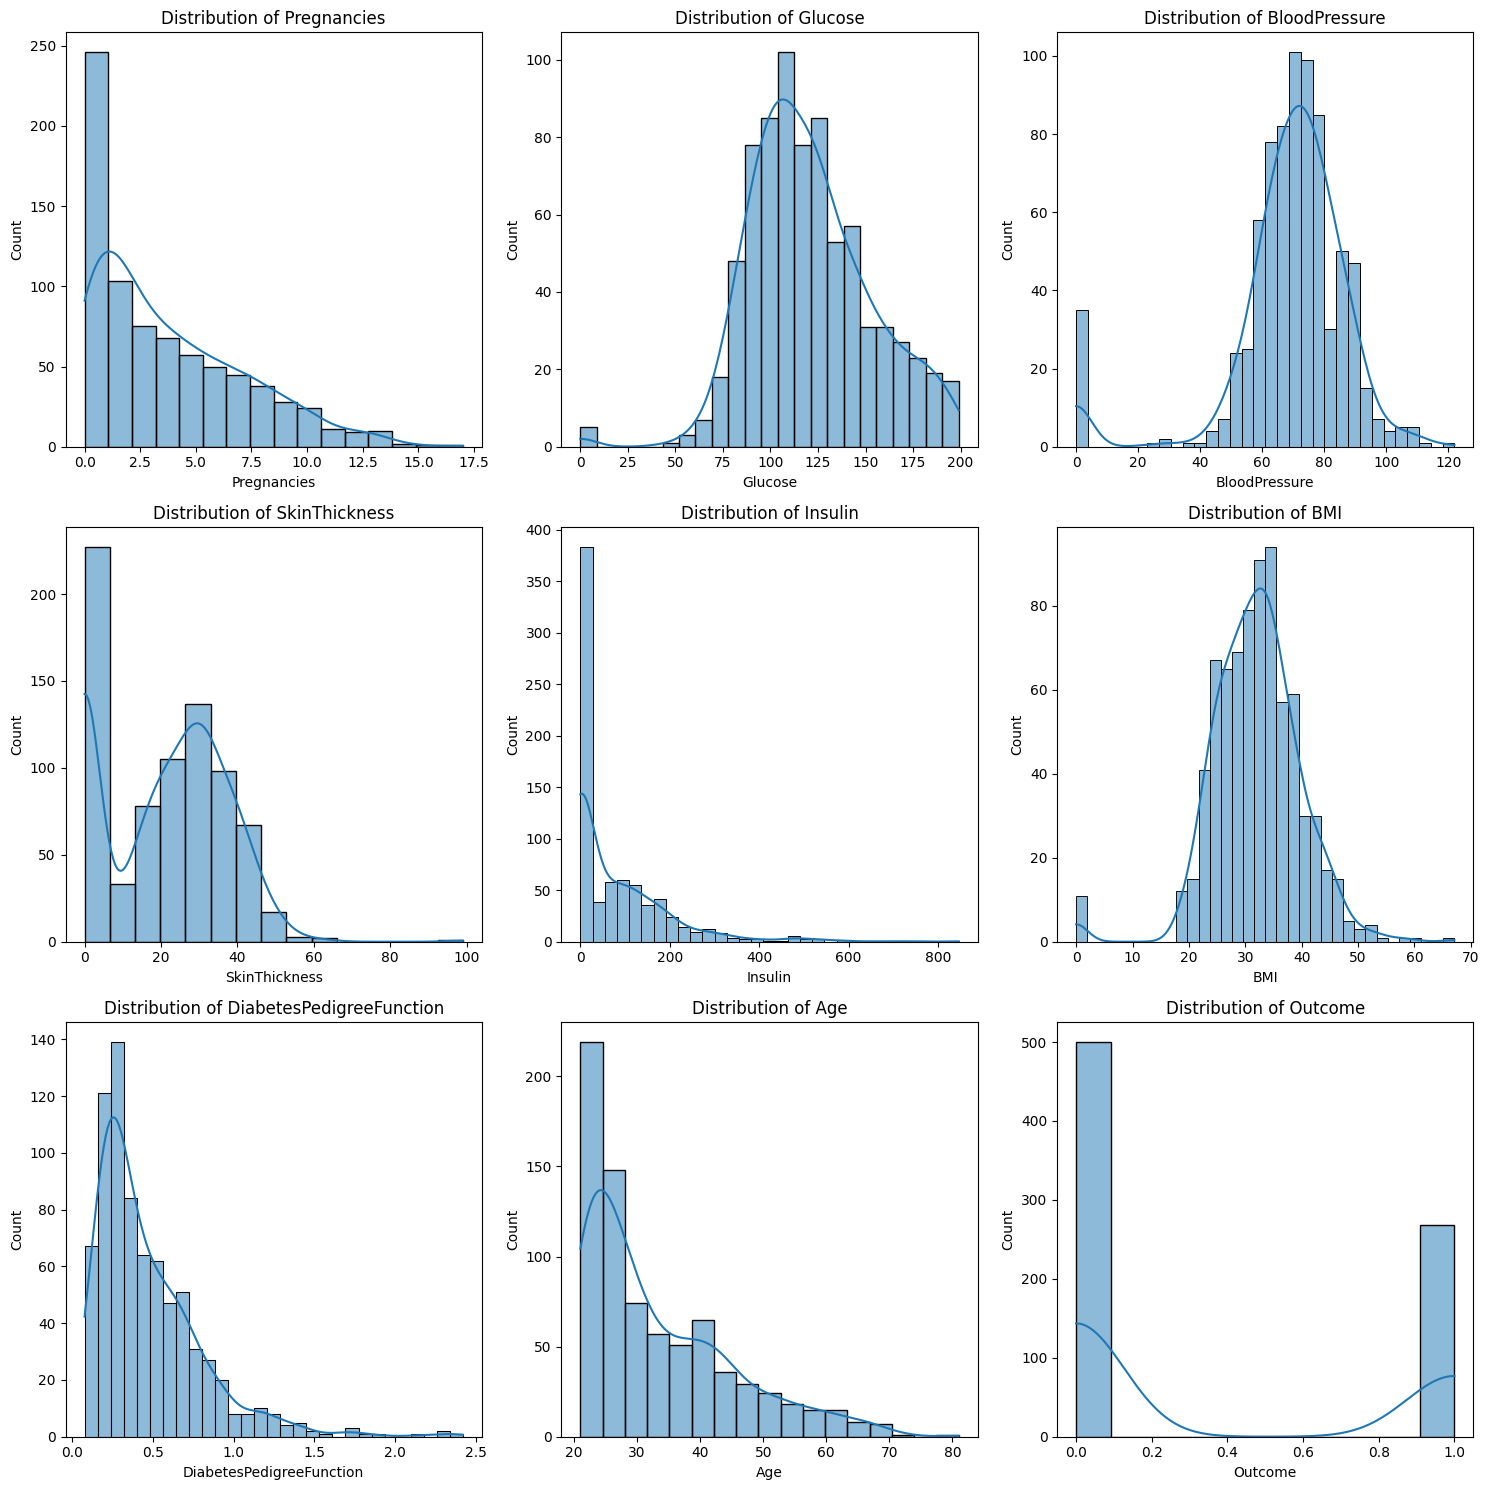

In [9]:
# Create distribution plots for each feature
features_to_plot = [col for col in df.columns]

# Determine the number of rows and columns for the matrix
n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create distribution plots for each feature on a separate subplot
for i, col in enumerate(features_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Univariate Analysis of Numerical Features
We decided to choose histograms as our visual tool to show how the values of each feature are distributed across it's range. We can find where **most values fall**, our **spread of values**, the **shape of the distribution** and perhaps any **unusual values such as outliers or anomalies**.

<h3>Numerical Features:</h3>


*   `Pregnancies` : We can see that we have a **right-skewed distribution**,a s a large portion of our data have a low number of pregnancies (0, 1, 2). This makes sense in a general population dataset as there a few individuals with a very high number of pregnancies (**could be a potential outlier**)
*   `Glucose` : We can see that there's a abnormal amount of data with people who have 0 glucose levels. This raises concern because medically speaking , a glucose level of 0 is impossible. Reasonings behind this could be that the values in the column could represent missing data or values that weren't recorded. Moving past that, we can see there seems to be a slight **positive right-skewed distribution**, indicating typical blood sugar ranges. We will need to imputate this column.
* `BloodPressure` : We can also see that there is an abnormality of data at 0 which is also medically impossible. Otherwise, the data seems very symmetrical, resembling a bell curve.
* `SkinThickness` : This plot has an even larger and taller bar at 0 , which is going to definitely cause issues when analyzing the data further. Otherwise we see a **right-skewed distribution**. We can see that many individuals have a natural low skin thickness. This column strongly requires **imputation**.
* `Insulin` : This is the most problematic distribution, having an enormous spike at 0 meaning we have a lot of missing data. For the non-zero values, we have a **extremely right-skewed** distribution with many of the values clustered around 200. The extreme skewness means that most people have low insulin levels but a few have very high levels (checks out because of diabetes). We will most likely need to **imputate and transform the data** to make it  more manageable for models for it's extreme outliers.
* `BMI` : There seems to be a bell curve centered around 30 but notice a small bar on the left for 0. Most of the distribution is quite normal but 0 means there is missing data there as it is physiologically impossible. We can see that there is a good chunk of data above ~25 BMI which is typically considered overweight to obese range; a key factor in diabetes.
* `DiabetesPedigreeFunction` : We can see a normal **right-skewed distribution** with a large bar at an average rate of 0.5; a bit under the current average at around 0.8.
* `Age` : The ages appear to be all in their early 20's - late 30's which means there are a large amount of young adults within the dataset. We have a **right-skewed distribution** with a tail leading towards what it seems to be 80 years old as the maximum.

<br>After going in depth with every feature, our observations are vital as they can directly guide our next steps in data preprocessing and feature engineering. We will need to address the **missing values**, consider **data transformations** and **managing outliers** before we start working on our predictive models.


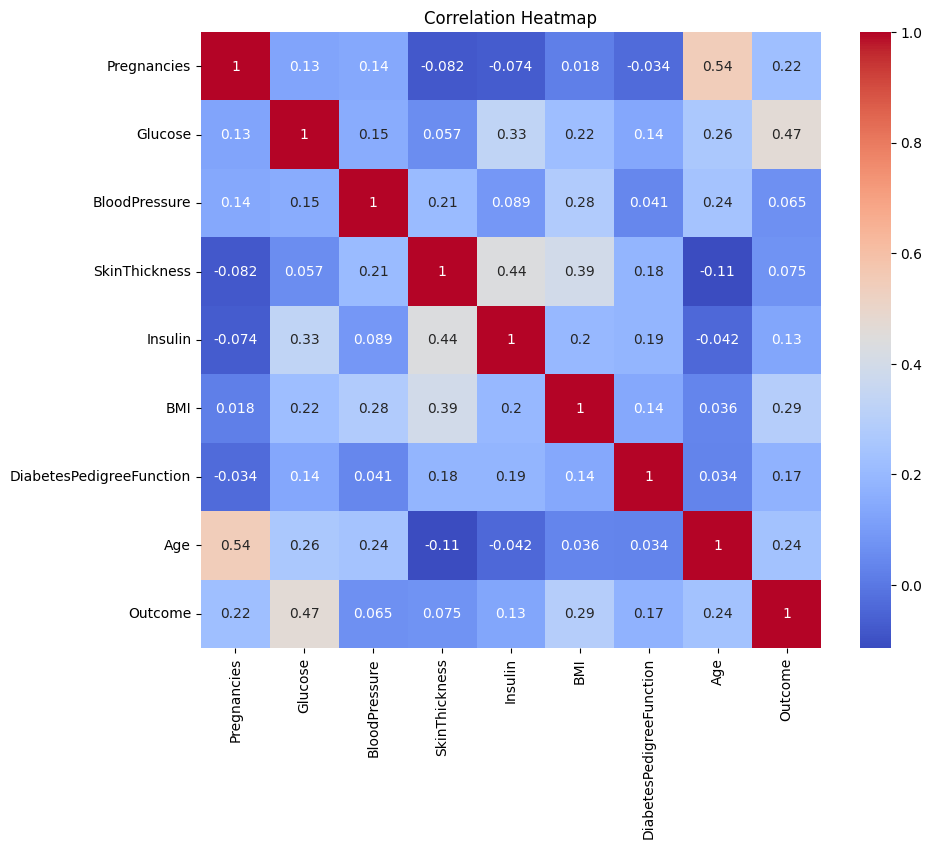

In [ ]:
# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Bivariate Analysis : Numerical Feature vs Numerical Feature
###(Correlation Matrix & Heatmap)

In our previous step, we looked at each numerical feature individually but now we're going to examine how the pairs of numerical features **relate to each other**. Are they moving in the same direction? Opposite directions? Or is there no clear pattern?

We represent the analysis using a **Correlation Heatmap** that tells us the *strength* and *direction* of the relationship between two of our numerical variables.

**Key Takeaways From Correlation Matrix**
* **Symmetrical :** The heatmap is symmetrical, which means the correlation between row `Glucose` and column `BMI` will be the same as the relation for row `BMI` and column `Glucose`.
* **Correlations with `Outcome` :**
  * We can see that `Glucose` has the **strongest positive correlation** (0.47) with `Outcome`. This means that as `Glucose` levels increase, the likelihood of someone having Diabetes tends t increase. This proves that high blood glucose is a primary indicator of diabetes, making `Glucose` a very important predictive feature.
  * `BMI` (0.29) shows a moderate positive correlation with `Outcome`. Higher `BMI` values are associated with higher likelihood of diabetes.
  * `Age` (0.22) shows a moderate positive correlation which shows that as `Age` increases, the chance of `Outcome` tends to increase.
  * `Pregnancies` (0.22) also has a moderate positive correlation, suggesting that having more pregnancies could be associated with a higher risk of diabetes.
  * `DiabetesPedigreeFunction` (0.17) is weaker but still a positive correlation; indicating that there a higher genetic predisposition score is linked to a higher chance of diabetes.
  * `Insulin` (0.13), `SkinThickness` (0.075), `BloodPressure` (0.065) show a relatively weaker positive correlation to `Outcome` which just means these features just aren't as strong.
* **Correlations Among Independent Features :**
  * We have 3 relatively strong correlations that could be a concern for *multicollinearity*.
  * `Glucose` and `Insulin` (0.33) are moderately positively correlated; as glucose levels go up so do insulin levels. Not typically a multicollinearity problem for modeling.
  * `Pregnancies` and `Age` (0.54) have a strong positive correlation. People who are older tend to have a higher pregnancy count, which is expected. This doesn't necessarily promote a severe multicollinearity problem for our models.
* **Summary of Insights :**
  * We can see that the key predictors for diabetes are `Glucose`, `BMI`, `Age`, and `Pregnancies`. They will be very influential in predicting diabetes status.
  * The observed correlations between `Glucose` with `Insulin`, `SkinThickness` with `BMI` and `Pregnancies` with `Age` align with medical expectations, increasing confidence of our data.
  * We can see taht is potential multicollinearity, so we will most likely need a more formal check using **Variance Inflation Factors** or **VIF's** during Feature Engineering.

## Data PreProcessing and Feature Engineering
After having thoroughly explored our dataset through univariate and bivariate analyses, we have a comprehensive understanding of its structure, distributions, relationships and most importantly; **the quality issues**.



To resolve these issues and prepare our data for modeling, we will:
* **Address Implausible Zero Values Through Data Cleaning :** As we identified during our univariate analysis, we have several features that contain 0 values. In a biological context, these are impossible measurements and represent missing data.

<br> Leaving these 0's in place would severely skew our data distributions after statistical analysis, possibly distort our correlations and mislead our machine learning model. By converting them to NaN, we can formally mark them as missing, allowing us to apply appropriate imputation techniques.

In [10]:
# Making copy to not tamper with raw sliced data
df_processed = df.copy()

# Listing columns where 0 is an implausible value
implausible_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in implausible_zero_columns:
    df_processed[column] = df_processed[column].replace(0, np.nan)

print("Missing Values in Each Column After Converting 0s to NaN:")
print(df_processed.isnull().sum())
print("Percentage of Missing Values After Converting 0s to NaN:")
print((df_processed.isnull().sum() / len(df_processed)) * 100)


Missing Values in Each Column After Converting 0s to NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Percentage of Missing Values After Converting 0s to NaN:
Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


## Imputation of Missing Values
We now choose an imputation strategy for our numerical features. We have to fill in the NaN data points to retain valuable feature values.

<br> <h3>Median Imputation</h3>
For our imputation of missing values (NaN), we will use the Median-Imputation Method.

Missing Values in Each Column After Median Imputation:
Series([], dtype: int64)


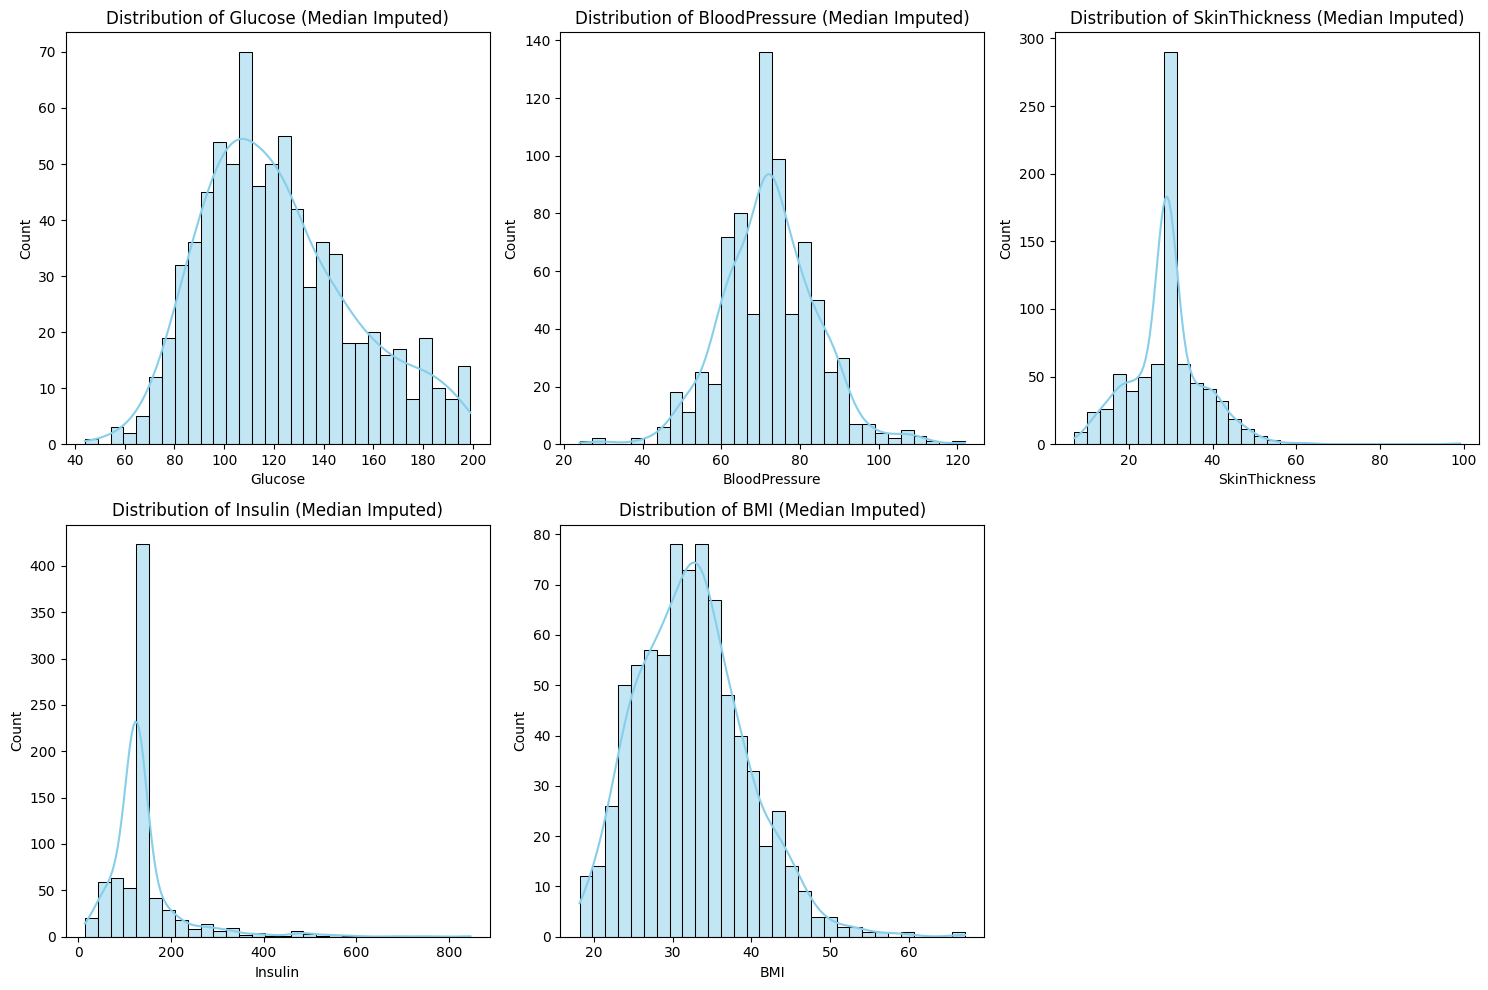

In [19]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the SimpleImputer with the strategy set to 'median'
imputer = SimpleImputer(strategy='median')

cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Fit and transform the imputer on the selected columns
df_median_imputed = df_processed.copy()
df_median_imputed[cols_to_impute] = imputer.fit_transform(df_median_imputed[cols_to_impute])

print("Missing Values in Each Column After Median Imputation:")
print(df_median_imputed.isnull().sum()[df_median_imputed.isnull().sum() > 0])

# Now we visually check for Median Imputation
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_impute):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_median_imputed[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} (Median Imputed)')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<h3>KNN Imputation</h3>
For the following imputation of missing values (NaN), we will use the K-Nearest Neighbor Method.

Missing Values in Each Column After KNN Imputation:
Series([], dtype: int64)


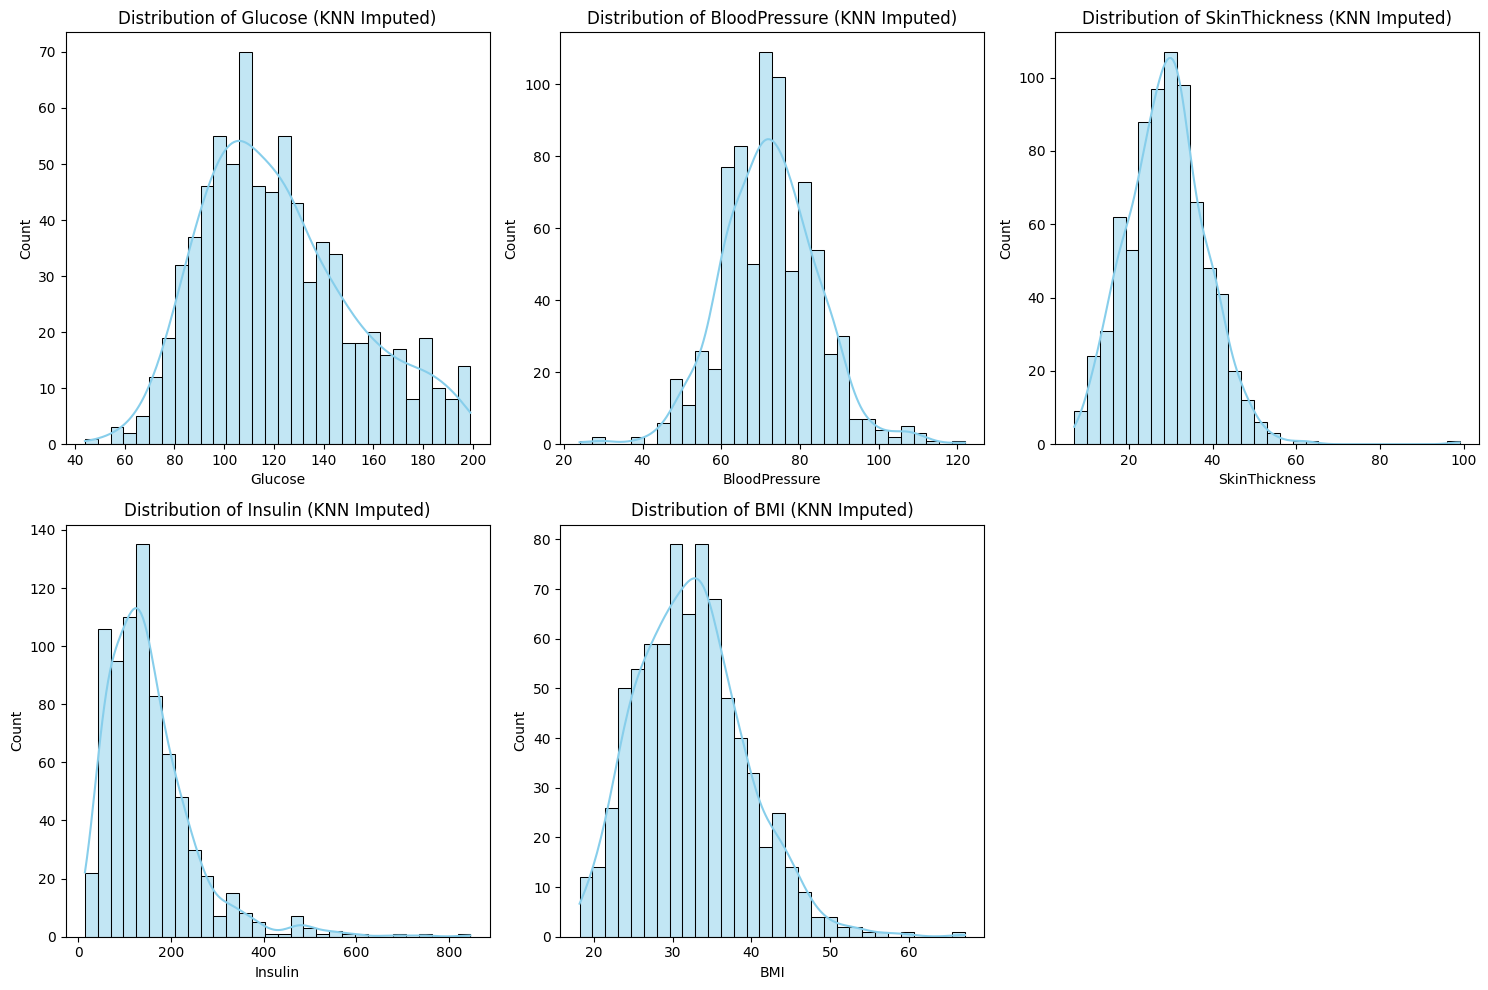

In [20]:
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

df_knn_imputed = df_processed.copy()

# Read that applying KNNImputer to all numerical columns to impute
all_numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed[all_numerical_cols] = knn_imputer.fit_transform(df_knn_imputed[all_numerical_cols])

print("Missing Values in Each Column After KNN Imputation:")
print(df_knn_imputed.isnull().sum()[df_knn_imputed.isnull().sum() > 0])

# Now we visually check for KNN Imputation
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_impute):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_knn_imputed[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} (KNN Imputed)')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<h3>Predictive Imputation (Linear Regression)<h3>

For this imputation method, we will use **Linear Regression** to predict missing values of the `Insulin` feature. Since insulin is highly correlated with other numeric features like `Glucose`, `BMI`, `Age`, and `SkinThickness`, a regression-based model can estimate missing values more accurately than just using central tendencies (like mean or median).

In [21]:
from sklearn.linear_model import LinearRegression

# Step 1: Work on a clean copy
df_predictive = df_processed.copy()

# Step 2: Separate rows with and without missing Insulin
insulin_missing = df_predictive[df_predictive['Insulin'].isna()]
insulin_not_missing = df_predictive[df_predictive['Insulin'].notna()]

# Step 3: Choose features to predict Insulin (you can adjust these)
features = ['Glucose', 'BMI', 'Age', 'SkinThickness', 'BloodPressure']

# Drop rows with missing features (only from training data)
insulin_not_missing = insulin_not_missing.dropna(subset=features)

# Step 4: Train regression model
X_train = insulin_not_missing[features]
y_train = insulin_not_missing['Insulin']

model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict missing insulin values
X_missing = insulin_missing[features]
X_missing = X_missing.dropna()  # Drop rows where predictor features are also missing

predicted_insulin = model.predict(X_missing)

# Step 6: Fill in the predicted values
df_predictive.loc[X_missing.index, 'Insulin'] = predicted_insulin


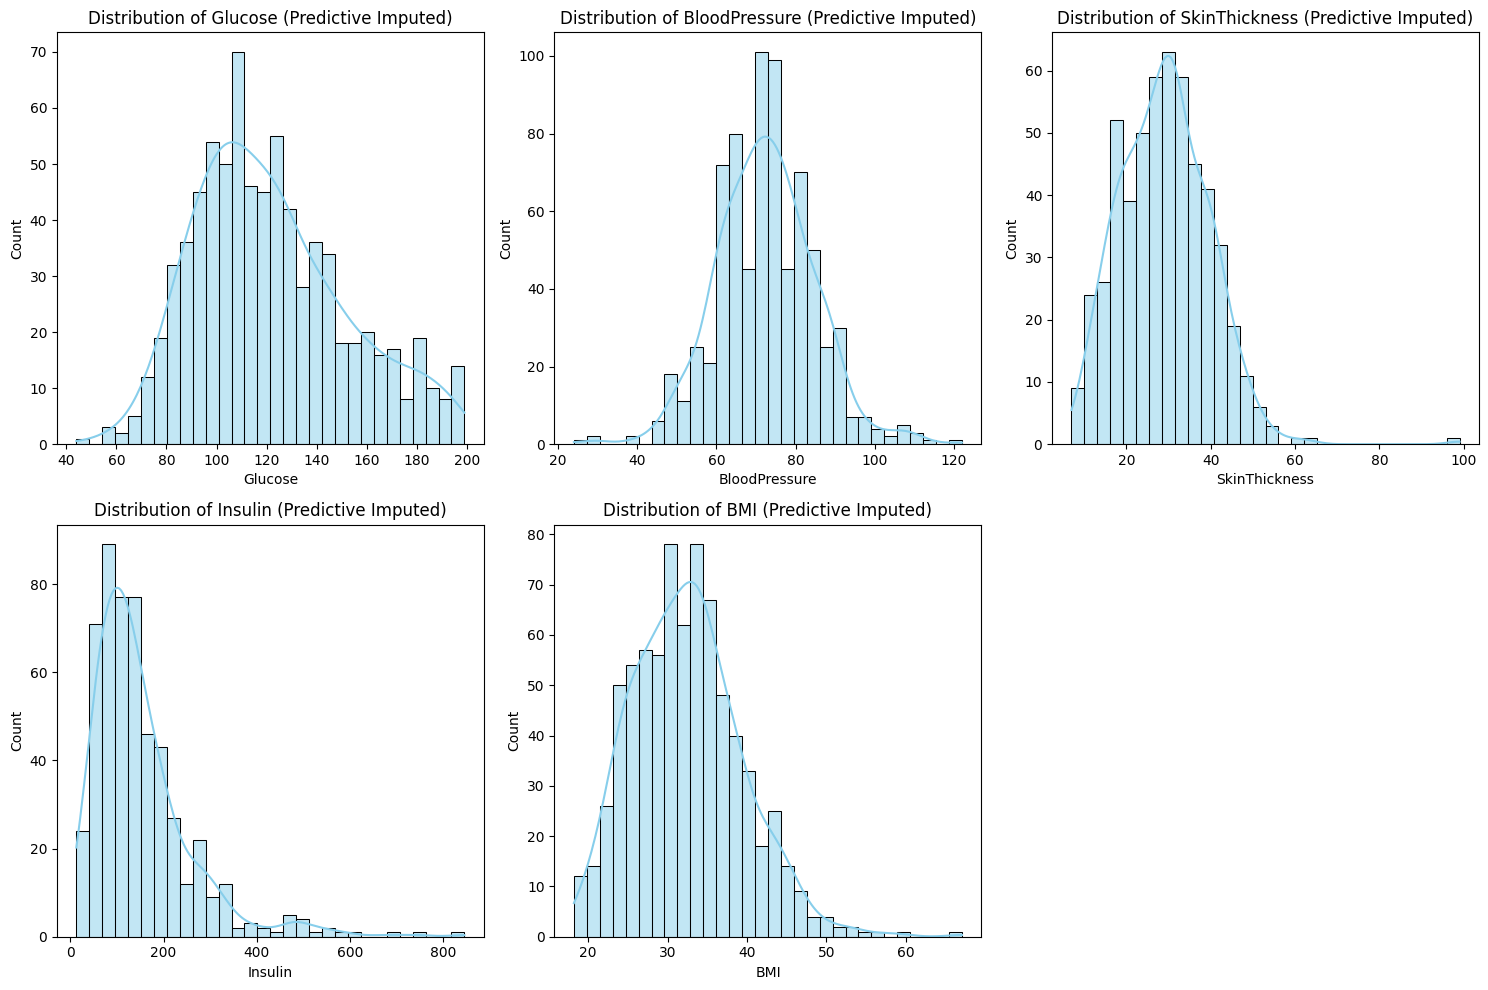

In [15]:
# List of features to visualize
features_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create subplot grid
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_predictive[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature} (Predictive Imputed)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()




###Feature Engineering and Transformation
Now after imputating the data values that were 0 (**we move forward with KNN Imputation**), changing them to NaN and applying 3 methods of imputation we will move onto modifying existing features to improve model performance. We saw many extreme right-skewed distributions so we to **transform** the data to alter its distribution (making the skewed data more symmetrical). Why would we do this?
* **To Enhance Model Performance :** With our features having certain distributional properties, transformations can address skewness and reduce the impact of outliers.
* **Displaying Complex Relationships :** New features created by combining existing ones can help distinguish linear from non-linear relationships that single features may not capture.
* **Addressing Model Assumptions :** As we move towards creating a **Logistic Regression**, reducing multicollinearity is important for stable coefficient estimates.

The following methods will be used for **Transformations :**
* **Log Transformation :** Applying log to a high right-skewed distribution can make it more symmetrical
* **Creating New Features :** Creating interaction terms and ratios of predictive knowledge
* **Testing Feature Engineering using VIFs :** After transforming existing features, we have to check for multicollinearity amongst predictor variables.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant # For VIF
import numpy as np
import pandas as pd

# Using Log Transformation; Based on Univariate Anaylsis for skewed columns
skewed_cols = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']
df_log_transformed = df_knn_imputed.copy()

# Creating New Features
# We will create BMI_Age_Interaction, Glucose_Insulin_Ratio
df_log_transformed['BMI_Age_Interaction'] = df_log_transformed['BMI'] * df_log_transformed['Age']
# Add a small constant to the denominator to avoid division by zero if needed, although KNN imputation should handle this.
df_log_transformed['Glucose_Insulin_Ratio'] = df_log_transformed['Glucose'] / (df_log_transformed['Insulin'] + 1e-9)


for col in skewed_cols:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

print("New Features Created : 'BMI_Age_Interaction', 'Glucose_Insulin_Ratio' ")
# Because of imputation, no 0's should remain
display(df_log_transformed.head())

# Testing Feature Engineering using VIFs
features_for_vif = df_log_transformed.drop(columns=['Outcome'], errors='ignore').select_dtypes(include=np.number).columns.tolist()


X_vif = add_constant(df_log_transformed[features_for_vif].dropna())

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data = vif_data[vif_data['Feature'] != 'const']

display(vif_data)

New Features Created : 'BMI_Age_Interaction', 'Glucose_Insulin_Ratio' 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Interaction,Glucose_Insulin_Ratio
0,1.945910,148.0,72.0,35.0,5.135798,33.6,0.486738,50.0,1.0,1680.0,0.875740
1,0.693147,85.0,66.0,29.0,4.087656,26.6,0.300845,31.0,0.0,824.6,1.450512
2,2.197225,183.0,64.0,25.8,5.109575,23.3,0.514021,32.0,1.0,745.6,1.111786
3,0.693147,89.0,66.0,23.0,4.553877,28.1,0.154436,21.0,0.0,590.1,0.946809
4,0.000000,137.0,40.0,35.0,5.129899,43.1,1.190279,33.0,1.0,1422.3,0.815476


,Feature,VIF
9,BMI_Age_Interaction,36.306492
8,Age,26.487415
6,BMI,11.839595
5,Insulin,6.349520
10,Glucose_Insulin_Ratio,3.523508
2,Glucose,2.836255
4,SkinThickness,1.788578
1,Pregnancies,1.387380
3,BloodPressure,1.268208
7,DiabetesPedigreeFunction,1.060500


## Outlier Handling (Refining the Data)

We have a few outliers we'd like to refine to ensure that our model training isn't disproportionately influenced. If we don't check for this, we could have a possibility of biased estimates or a reduced model performance (For our linear regression model). Why and how will we do this?
* Reviewing distributions after imputation and transformation to make sure all values look good.
* **Removal :** Clearing very few outliers that cannot be handled.
* **Model Choice :** We will invest time into searching for robust models that can handle outliers or any alternatives.


In [28]:
from scipy.stats.mstats import winsorize

df_log_transformed['Age_winsorized'] = winsorize(df_log_transformed['Age'], (0.01, 0.01))
# Decide whether to use 'Age' or 'Age_winsorized' in the final model

print("Outlier handling strategies will be applied based on feature distribution and domain context.")

Outlier handling strategies will be applied based on feature distribution and domain context.


## Feature Scaling (Using Standardization/Normalization)
After Feature Engineering and refinement of our data, we now move on to adjust the range of values for numerical features so they're on a similar scale. We are now moving towards the end of our preprocessing steps and moving into feeding the data into a machine learning model. How and why will we do this? :
* **Apply Scaling :** We will choose StandardScaler (for standardization) and apply it to all numerical independent features. We must train and test the data prior as well by defining our Features (X) and Target (Y).

Features to Scale : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Age_Interaction', 'Glucose_Insulin_Ratio', 'Age_winsorized']
Scaling Complete

Visualizing distributions of a few scaled features:


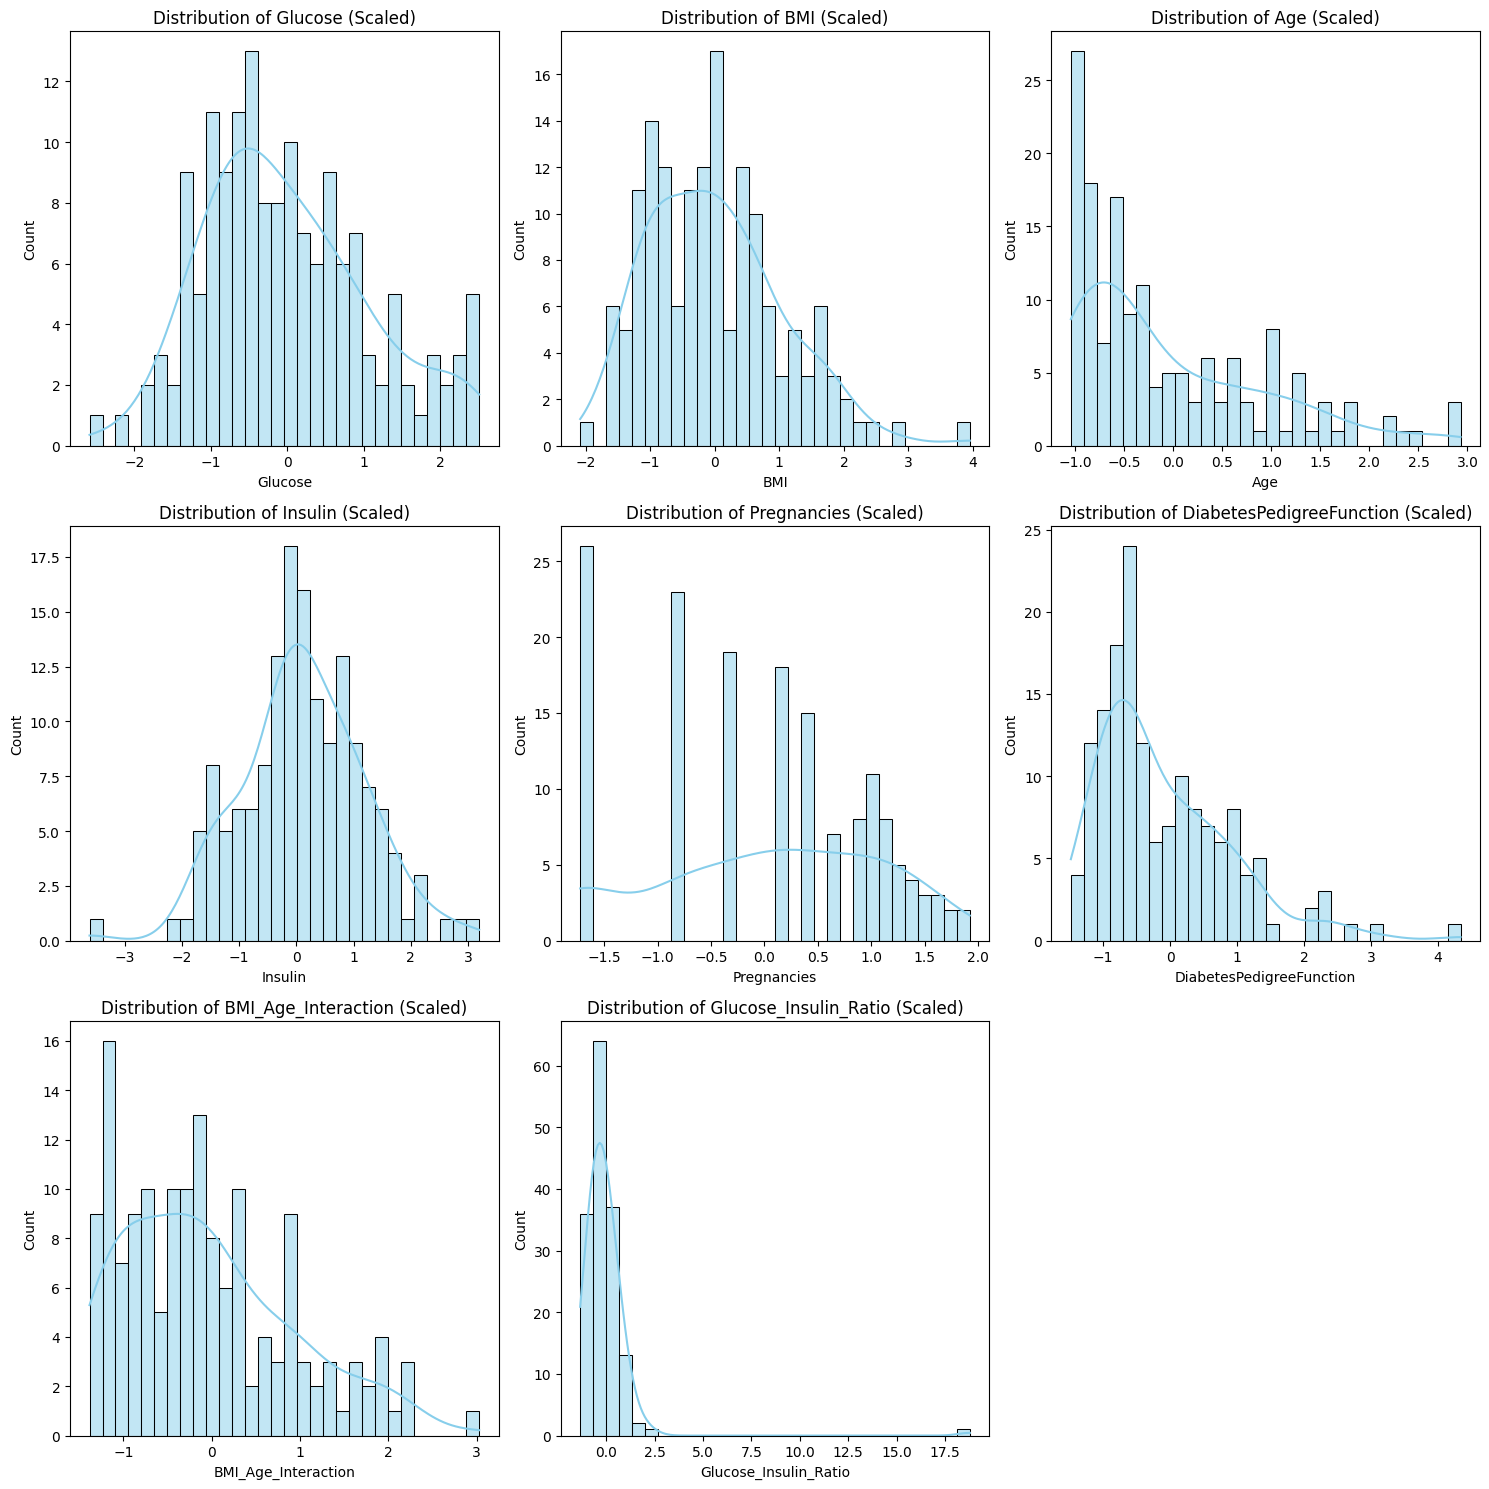

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining Features (X) and Target (y)
X = df_log_transformed.drop('Outcome', axis=1)
y = df_log_transformed['Outcome']

# Using our FINAL set of features for modeling to scale.
features_to_scale = X.select_dtypes(include=np.number).columns.tolist()

# Making sure all columns are found within our training data.
features_to_scale = [f for f in features_to_scale if f in X.columns]
print(f"Features to Scale : {features_to_scale}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Scaling Complete")

print("\nVisualizing distributions of a few scaled features:")
plt.figure(figsize=(15, 15))

# Selecting features to visualize
features_to_visualize = ['Glucose', 'BMI', 'Age', 'Insulin', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI_Age_Interaction', 'Glucose_Insulin_Ratio']

for i, col in enumerate(features_to_visualize):
   plt.subplot(3, 3, i + 1) # Changed subplot grid to 3 rows and 3 columns
   sns.histplot(X_test_scaled[col], kde=True, bins=30, color='skyblue')
   plt.title(f'Distribution of {col} (Scaled)')
   plt.xlabel(col)
   plt.ylabel('Count')

plt.tight_layout()
plt.show()

##Logistic Regression and Evaluation Metrics

In this section, we train a baseline **Logistic Regression** model on the preprocessed and scaled dataset. Once trained, we use it to predict the class labels for the test set.

To evaluate the model, we implement custom functions to calculate key performance metrics manually:
- Accuracy
- Precision
- Recall
- F1 Score
- Specificity


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

def get_confusion_elements(y_true, y_pred):
    # Uses 1 as positive, 0 as negative
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TN, FP, FN, TP

def custom_metrics(y_true, y_pred):
    TN, FP, FN, TP = get_confusion_elements(y_true, y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1 Score": f1
    }

# y_test = actual values
# y_pred = model predictions

# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Generate predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Crosstab confusion matrix
ct = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
print("Crosstab Confusion Matrix:\n", ct)

# Custom Metrics
custom_results = custom_metrics(y_test, y_pred)
print("\nCustom Metrics:")
for k, v in custom_results.items():
    print(f"{k}: {v:.4f}")

# Sklearn Metrics for comparison
print("\nSklearn Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Custom performance metrics displayed alongside Python's library for these methods
def compare_metrics(y_true, y_pred):
    custom = custom_metrics(y_true, y_pred)
    sklearn = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "Specificity": get_confusion_elements(y_true, y_pred)[0] /
                      (get_confusion_elements(y_true, y_pred)[0] + get_confusion_elements(y_true, y_pred)[1])
    }

    df = pd.DataFrame([custom, sklearn], index=["Custom", "Sklearn"])
    return df.T

compare_metrics(y_test, y_pred)


Crosstab Confusion Matrix:
 Predicted  0.0  1.0
Actual             
0.0         17    2
1.0          9    2

Custom Metrics:
Accuracy: 0.7013
Precision: 0.5870
Recall: 0.5000
Specificity: 0.8100
F1 Score: 0.5400

Sklearn Metrics:
Accuracy: 0.7012987012987013
Precision: 0.5869565217391305
Recall: 0.5
F1 Score: 0.54


,Custom,Sklearn
Accuracy,0.701299,0.701299
Precision,0.586957,0.586957
Recall,0.500000,0.500000
Specificity,0.810000,0.810000
F1 Score,0.540000,0.540000


## Testing Hyperparameters
Tested combinations of hyperparameters to see and improve on how the model performs to generalize its use. Can also do this to logistic regression or another classifier such as random forest.

Tuned the values for regression:

C: How strict the model is to regularize the data.

penalty: Whether to use L1 or L2 regularization as L1 removes data with lower values while L2 does not zero out any data values.


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Define model
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']
}

# Grid Search
grid_search_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_lr.best_params_)
best_log_model = grid_search_lr.best_estimator_

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)

print("Best Tree Params:", grid_tree.best_params_)
best_tree_model = grid_tree.best_estimator_

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_

# Get predictions from best model
y_pred_best = best_rf_model.predict(X_test)

# Compare metrics
compare_metrics(y_test, y_pred_best)



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Tree Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best RF Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


,Custom,Sklearn
Accuracy,0.727273,0.727273
Precision,0.615385,0.615385
Recall,0.592593,0.592593
Specificity,0.800000,0.800000
F1 Score,0.603774,0.603774


## SMOTE and Undersampling to Fix Unbalanced Data
Predictive models need a balanced target variable to avoid being skewed towards the majority. The data countplot in the EDA shows that there are much more non-diabetics than there are diabetics which needs to be addressed to build a predictive model with less bias.

Corrected this imbalance through using:


1.   SMOTE
2.   Random Undersampling

SMOTE artificially creates and adds new cases of diabetic data based off existing examples. This allows the model to learn what a diabetic case may look like without just making a copy of another case.

Random undersampling has the opposite effect and reduces the non-diabetic cases by removing them randomly to balance out the dataset. However, this does come at the cost of losing some data.

Class Distribution:
 Outcome
0.0    400
1.0    214
Name: count, dtype: int64


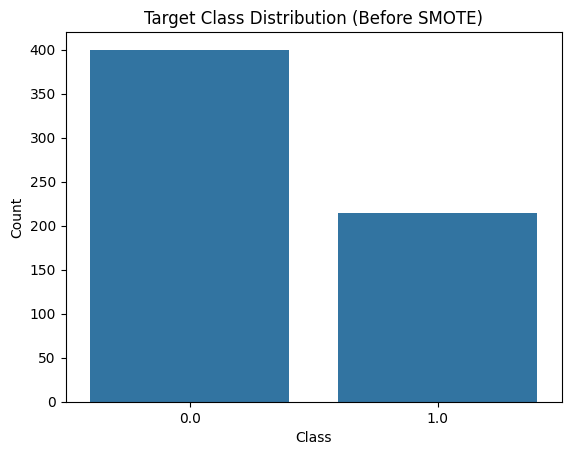

After SMOTE:
 Outcome
0.0    400
1.0    400
Name: count, dtype: int64


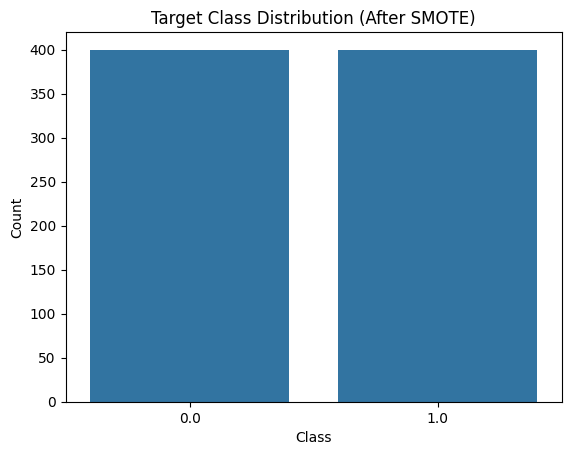

After Undersampling:
 Outcome
0.0    214
1.0    214
Name: count, dtype: int64


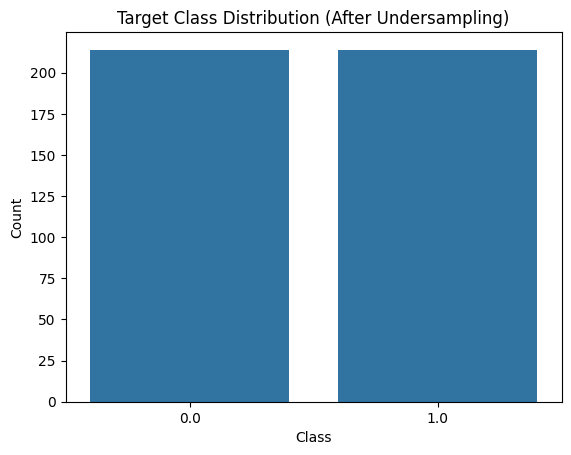

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Custom,Sklearn
Accuracy,0.720779,0.720779
Precision,0.584615,0.584615
Recall,0.703704,0.703704
Specificity,0.730000,0.730000
F1 Score,0.638655,0.638655


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance
class_counts = y_train.value_counts()
print("Class Distribution:\n", class_counts)

# Plot
sns.countplot(x=y_train)
plt.title("Target Class Distribution (Before SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check balance after SMOTE
print("After SMOTE:\n", y_train_sm.value_counts())

# Plot
sns.countplot(x=y_train_sm)
plt.title("Target Class Distribution (After SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check balance after undersampling
print("After Undersampling:\n", y_train_rus.value_counts())

# Plot
sns.countplot(x=y_train_rus)
plt.title("Target Class Distribution (After Undersampling)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test)

compare_metrics(y_test, y_pred_sm)


# Retest Regression Model Using SMOTE Data

Evaluation of Logistic Regression on SMOTE-balanced data:
               Custom   Sklearn
Accuracy     0.720779  0.720779
Precision    0.590164  0.590164
Recall       0.666667  0.666667
Specificity  0.750000  0.750000
F1 Score     0.626087  0.626087

Confusion Matrix (SMOTE model):
 Predicted  0.0  1.0
Actual             
0.0         14    5
1.0          7    4


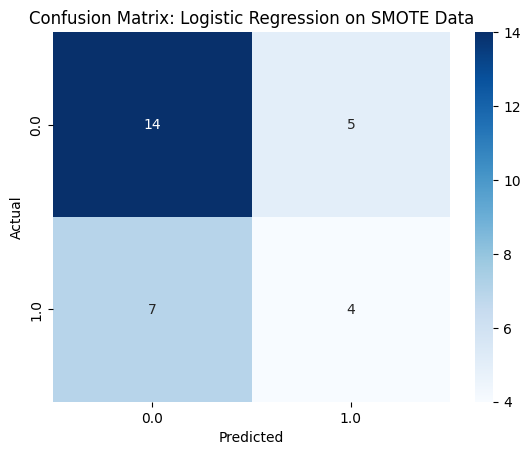

In [38]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression on SMOTE-balanced training data
logreg_smote = LogisticRegression(solver='liblinear', random_state=42)
logreg_smote.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_smote = logreg_smote.predict(X_test)

# Evaluate using custom metric function
print("Evaluation of Logistic Regression on SMOTE-balanced data:")
print(compare_metrics(y_test, y_pred_smote))

# Confusion matrix with crosstab
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ct_sm = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_smote, name='Predicted'))
print("\nConfusion Matrix (SMOTE model):\n", ct_sm)

sns.heatmap(ct_sm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression on SMOTE Data")
plt.show()


##Evaluate Logistic Regression Model Trained on SMOTE Data

After applying SMOTE to handle class imbalance, we now evaluate the performance of the logistic regression model trained on the balanced dataset.

We'll:
- Generate a new confusion matrix
- Recalculate Accuracy, Precision, Recall, Specificity, and F1 Score
- Compare these metrics with the original model
- Plot the ROC curve and calculate the AUC score


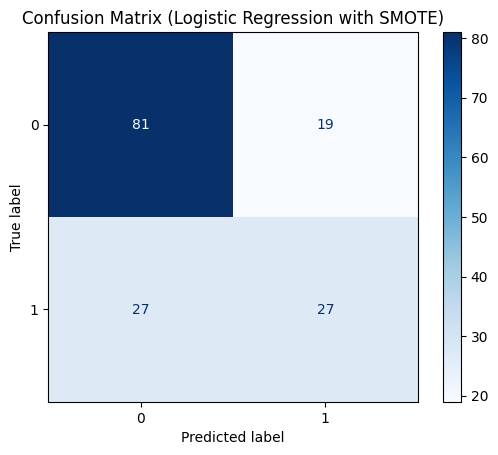

Evaluation Metrics (Logistic Regression with SMOTE):
Accuracy: 0.7013
Precision: 0.5870
Recall: 0.5000
F1 Score: 0.5400


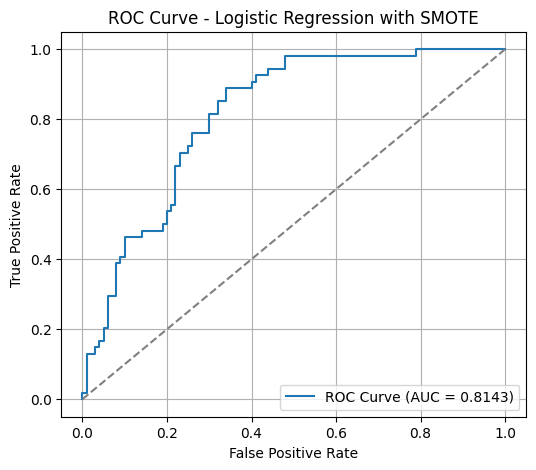

In [50]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Train the model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = log_model.predict(X_test_scaled)
y_proba_logreg = log_model.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression with SMOTE)")
plt.show()

# 2. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("Evaluation Metrics (Logistic Regression with SMOTE):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)
roc_auc = roc_auc_score(y_test, y_proba_logreg)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend()
plt.grid(True)
plt.show()



##Model Creation and Comparison

To compare various classification models for predicting diabetes, we implemented and evaluated four machine learning models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**

Each model was trained using the same training dataset, and performance was assessed on the same test set for consistency. To ensure fairness, we applied **k-fold cross-validation** and evaluated each model using metrics such as **Accuracy**, **Precision**, **Recall**, **F1 Score**, and **ROC AUC**.

### Purpose:
This step helps in identifying the best-performing model based on the dataset, balancing predictive power with interpretability.

Below is the implementation and comparison.


In [52]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Keep previously trained logistic regression results
models = {
    "Logistic Regression": (y_pred_logreg, y_proba_logreg)
}


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and simplified hyperparameter grids
param_grids = {
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.5, 1],
            "kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5],
            "weights": ["uniform", "distance"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, None],
            "min_samples_split": [2, 5]
        }
    }
}

# Train and evaluate each model
for name, config in param_grids.items():
    # Use RandomizedSearchCV for faster tuning
    search = RandomizedSearchCV(
        estimator=config["model"],
        param_distributions=config["params"],
        n_iter=3,  # Only try 3 random combinations
        cv=cv,
        scoring="f1",
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train_sm, y_train_sm)
    best_model = search.best_estimator_

    # Predict on test data
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Store results
    models[name] = (y_pred, y_proba)

# Create results summary table
results = []
for name, (y_pred, y_proba) in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Display results
results_df = pd.DataFrame(results).set_index("Model")
display(results_df.round(4))



KeyboardInterrupt: 

#References
https://www.aad.org/public/diseases/a-z/diabetes-warning-signs

https://my.clevelandclinic.org/health/diseases/7104-diabetes